In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('googleplaystore.csv.xlsx')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

App                  1
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Исправление значений в колонке Reviews

In [6]:
bad_values = df.loc[pd.to_numeric(df['Reviews'], errors='coerce').isna(), 'Reviews']
print('Проблемные значения:')
print(bad_values)

Проблемные значения:
10472    3.0M
Name: Reviews, dtype: object


In [7]:
df.loc[bad_values.index, 'Reviews'] = (pd.to_numeric(df.loc[bad_values.index, 'Reviews'].str.replace('M', '', regex=False),errors='coerce') * 1_000_000)

In [8]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [9]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                           3000000
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

# Исправление значений в колонке - замена на среднее

In [10]:
df.loc[df['Rating']>5,'Rating']=np.nan

In [11]:
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [12]:
df['Rating'].isna().sum()

np.int64(0)

# Дубликаты

In [13]:
df[df.duplicated(subset='App')].sort_values('App').head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
7035,420 BZ Budeze Delivery,MEDICAL,5.0,2,11M,100+,Free,0,Mature 17+,Medical,"June 6, 2018",1.0.1,4.1 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


# Выводим с оригиналами

In [14]:
df[df.duplicated(subset='App', keep=False)].sort_values('App').head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up


# Замена _ на пробелы в категории

In [15]:
df['Category']=df['Category'].str.capitalize().str.replace('_',' ')

# Замены в столбце установки

In [16]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [17]:
df['Installs']=df['Installs'].str.replace(',','').str.strip('+')

In [18]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

# Обработка Size - перевести в единый формат и удалить буквы

In [19]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art and design,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",Art and design,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art and design,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [21]:
df['Size'] = df['Size'].replace('Varies with device', '0')

In [22]:
df[df['Size']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [23]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '0', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M',
       '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M',
       '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M',
       '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M', '23k', '6.5M',
       '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M', '8.3M', '4.3M',
       '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M', '5.1M', '61M',
       '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M', '6.2M', '18k',
       

# Функция переводит разные исходные размеры в байты

In [24]:
def ch(sizes):
    if sizes[-1]=='M':
        return float(sizes.replace('M',''))*1024*1024
    elif sizes[-1]=='k':
        return float(sizes.replace('k',''))*1024
    else:
        try:
            return float(sizes)  
        except:
            return None 

In [25]:
df["Size"] = df["Size"].apply(ch)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


# В колонке цена убираем доллары и 'Everyone'

In [27]:
df.Price.unique()

array([0, '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [28]:
df['Price']=df['Price'].replace({'Everyone': '0', 0: '0'})

In [29]:
df['Price']=df['Price'].str.replace('$','').astype(float)

In [30]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

# Определяем категорию приложения - платное или бесплатное

In [31]:
df['Distribution'] = df['Price'].apply(lambda x: 'Paid' if x != 0 else 'Free')

In [32]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,Art and design,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free


# Анализ

In [33]:
df.groupby('Category')['App'].count().sort_values(ascending = False)

Category
Family                 1972
Game                   1144
Tools                   843
Medical                 463
Business                460
Productivity            424
Personalization         392
Communication           387
Sports                  384
Lifestyle               382
Finance                 366
Health and fitness      341
Photography             335
Social                  295
News and magazines      283
Shopping                260
Travel and local        258
Dating                  234
Books and reference     231
Video players           175
Education               156
Entertainment           149
Maps and navigation     137
Food and drink          127
House and home           88
Auto and vehicles        85
Libraries and demo       85
Weather                  82
Art and design           65
Events                   64
Parenting                60
Comics                   59
Beauty                   53
Name: App, dtype: int64

In [34]:
df.sort_values('Price',ascending = False).head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4367,I'm Rich - Trump Edition,Lifestyle,3.600000,275,7654604.8,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,Paid
9934,I'm Rich/Eu sou Rico/Ø£Ù†Ø§ ØºÙ†ÙŠ/æˆ‘å¾ˆæœ‰éŒ¢,Lifestyle,4.191757,0,41943040.0,0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,Paid
5356,I Am Rich Premium,Finance,4.100000,1867,4928307.2,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,Paid


Самое дорогое приложение

In [35]:
df.loc[df['Price'].idxmax()]

App               I'm Rich - Trump Edition
Category                         Lifestyle
Rating                                 3.6
Reviews                                275
Size                             7654604.8
Installs                             10000
Type                                  Paid
Price                                400.0
Content Rating                    Everyone
Genres                           Lifestyle
Last Updated                   May 3, 2018
Current Ver                          1.0.1
Android Ver                     4.1 and up
Distribution                          Paid
Name: 4367, dtype: object

In [36]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.100000,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Free
1,Coloring book moana,Art and design,3.900000,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Free
2,"U Launcher Lite â€“ FREE Live Cool Themes, Hid...",Art and design,4.700000,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Free
3,Sketch - Draw & Paint,Art and design,4.500000,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Free
4,Pixel Draw - Number Art Coloring Book,Art and design,4.300000,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.500000,38,55574528.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Free
10837,Fr. Mike Schmitz Audio Teachings,Family,5.000000,4,3774873.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,Free
10838,Parkinson Exercices FR,Medical,4.191757,3,9961472.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up,Free
10839,The SCP Foundation DB fr nn5n,Books and reference,4.500000,114,0.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,Free


# Визуализация

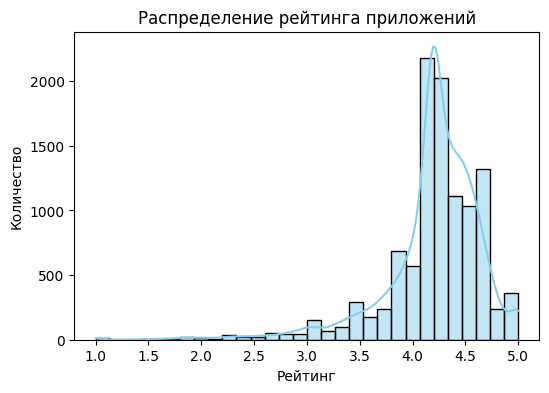

In [37]:
# Гистограмма рейтингов
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Распределение рейтинга приложений')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

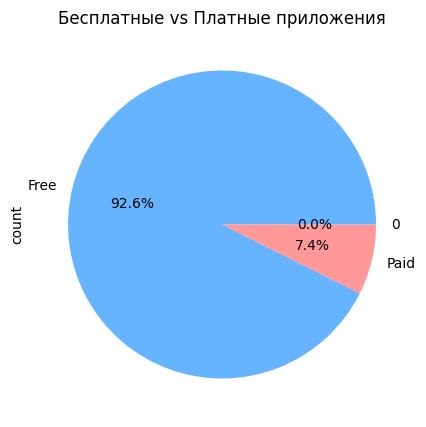

In [43]:
# Круговая диаграмма типа приложения
plt.figure(figsize=(5,5))
df['Type'].value_counts().plot(kind='pie', autopct='%.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Бесплатные vs Платные приложения')
plt.show()

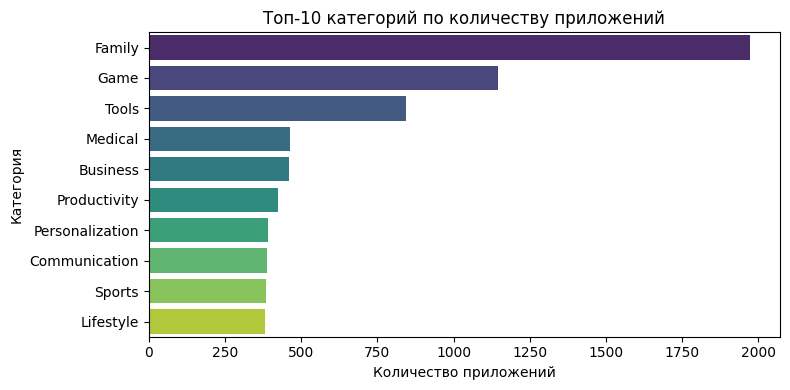

In [48]:
# Топ-10 категорий по количеству приложений 
top_categories = df['Category'].value_counts().nlargest(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index, dodge=False, palette='viridis', legend=False)
plt.title('Топ-10 категорий по количеству приложений')
plt.xlabel('Количество приложений')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()